<a href="https://colab.research.google.com/github/TillVollmer5/mass_spectroscopy/blob/main/Spearman_corr_all_compounds.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from google.colab import drive
import pandas as pd
from scipy.stats import spearmanr
import matplotlib.pyplot as plt
from scipy.cluster import hierarchy
import seaborn as sns
import scipy
import scipy.cluster.hierarchy as sch

drive.mount('/content/drive', force_remount = True)

Mounted at /content/drive


In [2]:
df = pd.read_csv('/content/drive/My Drive/unknown_screening_data/Filtered_Result_With_Detection_Frequency_02.csv')
print(df.head())
print(df.columns)
print(df.index)
# Set the index to the "Unnamed: 0" column
df = df.drop(columns=['Formula (mol ion)', 'Detection Frequency']).set_index('Unnamed: 0')
print(df.head())

                                          Unnamed: 0 Formula (mol ion)  \
0  4H-Cyclopenta[b]thiophene-3-carboxylic acid, 2...        C17H15NO5S   
1                   N-Arachidoyl-5-hydroxytryptamine        C30H50N2O2   
2  9-(3-Chlorobenzyl)-9-hydroxy-3,6,10,10-tetrame...         C25H25ClO   
3  Propanoic acid, 2,3,3,3-tetrafluoro-2-methoxy-...      C10H6ClF4NO5   
4           Butanenitrile, 2,3-bis(benzoyloxyimino)-        C18H13N3O4   

   Detection Frequency  Auto_5_gp_df  Auto_4_gp_df  Auto_3_gp_df  \
0                  0.2           0.0      0.000000      0.000000   
1                  0.3           0.0      0.038737      0.002214   
2                  0.2           0.0      0.000000      0.074779   
3                  0.2           0.0      0.000000      0.000000   
4                  0.2           0.0      0.000000      0.011650   

   Auto_2_gp_df  Auto_1_gp_df  Auto_5_pm_df  Auto_4_pm_df  Auto_3_pm_df  \
0      0.000000      0.000000           0.0           0.0      0.012104

In [3]:
def cluster_corr(corr_array, inplace=False):
    """
    Rearranges the correlation matrix, corr_array, so that groups of highly
    correlated variables are next to eachother

    Parameters
    ----------
    corr_array : pandas.DataFrame or numpy.ndarray
        a NxN correlation matrix

    Returns
    -------
    pandas.DataFrame or numpy.ndarray
        a NxN correlation matrix with the columns and rows rearranged
    """
    pairwise_distances = sch.distance.pdist(corr_array)
    linkage = sch.linkage(pairwise_distances, method='complete')
    cluster_distance_threshold = pairwise_distances.max()/2
    idx_to_cluster_array = sch.fcluster(linkage, cluster_distance_threshold,
                                        criterion='distance')
    idx = np.argsort(idx_to_cluster_array)

    if not inplace:
        corr_array = corr_array.copy()

    if isinstance(corr_array, pd.DataFrame):
        return corr_array.iloc[idx, :].T.iloc[idx, :]
    return corr_array[idx, :][:, idx]

In [4]:
compound_columns = [col for col in df.columns if '_gp_df' in col]

# Creating a new dataframe with only the relevant columns
compound_df = df[compound_columns]

# Calculating the Spearman rank correlation
correlation_matrix_gp_samples = compound_df.corr(method='spearman')

# Displaying the result
print(correlation_matrix_gp_samples)

              Auto_5_gp_df  Auto_4_gp_df  Auto_3_gp_df  Auto_2_gp_df  \
Auto_5_gp_df      1.000000      0.042649     -0.004226      0.036404   
Auto_4_gp_df      0.042649      1.000000      0.214131     -0.017889   
Auto_3_gp_df     -0.004226      0.214131      1.000000     -0.040368   
Auto_2_gp_df      0.036404     -0.017889     -0.040368      1.000000   
Auto_1_gp_df      0.099987     -0.011950     -0.031502      0.097592   

              Auto_1_gp_df  
Auto_5_gp_df      0.099987  
Auto_4_gp_df     -0.011950  
Auto_3_gp_df     -0.031502  
Auto_2_gp_df      0.097592  
Auto_1_gp_df      1.000000  


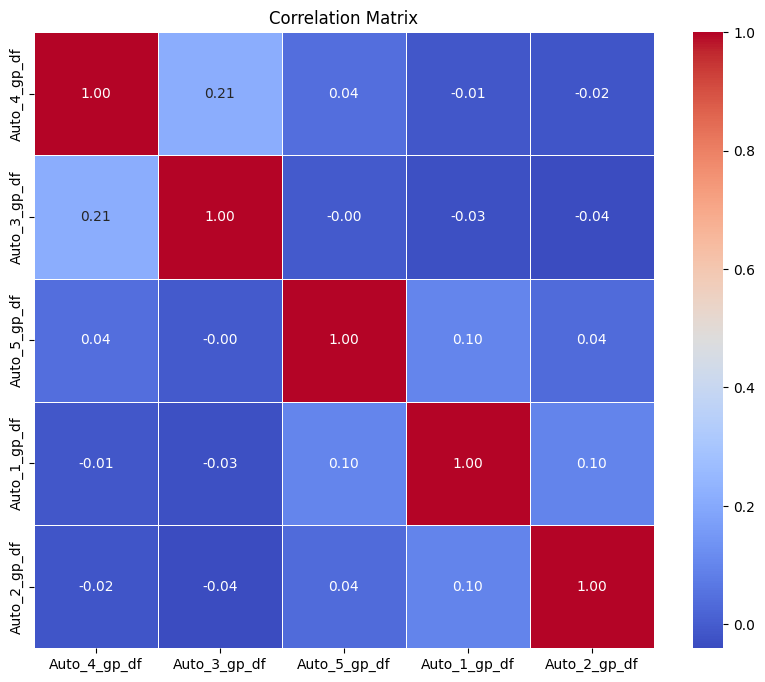

In [5]:
correlation_df_gp = correlation_matrix_gp_samples.apply(pd.to_numeric, errors='coerce')

plt.figure(figsize=(10, 8))
sns.heatmap(cluster_corr(correlation_df_gp), annot=True, cmap='coolwarm', linewidths=.5, fmt=".2f")
plt.title('Correlation Matrix')
plt.savefig(f'/content/drive/My Drive/Spearmann_c_analysis/Spearmanc_heat_gp_all_compounds.png', dpi=300, bbox_inches='tight')
plt.show()

In [6]:
# Calculate Spearman rank correlation matrix
correlation_matrix_total = df.corr(method='spearman')

# Display the correlation matrix
print(correlation_matrix_total)

              Auto_5_gp_df  Auto_4_gp_df  Auto_3_gp_df  Auto_2_gp_df  \
Auto_5_gp_df      1.000000      0.042649     -0.004226      0.036404   
Auto_4_gp_df      0.042649      1.000000      0.214131     -0.017889   
Auto_3_gp_df     -0.004226      0.214131      1.000000     -0.040368   
Auto_2_gp_df      0.036404     -0.017889     -0.040368      1.000000   
Auto_1_gp_df      0.099987     -0.011950     -0.031502      0.097592   
Auto_5_pm_df     -0.035436     -0.058240     -0.129540     -0.124683   
Auto_4_pm_df     -0.106032     -0.129428     -0.113693     -0.132265   
Auto_3_pm_df     -0.006205     -0.093744     -0.144674     -0.009367   
Auto_2_pm_df     -0.120152     -0.102581     -0.102141     -0.052262   
Auto_1_pm_df     -0.070412     -0.241944     -0.141856     -0.126691   

              Auto_1_gp_df  Auto_5_pm_df  Auto_4_pm_df  Auto_3_pm_df  \
Auto_5_gp_df      0.099987     -0.035436     -0.106032     -0.006205   
Auto_4_gp_df     -0.011950     -0.058240     -0.129428     -0.0

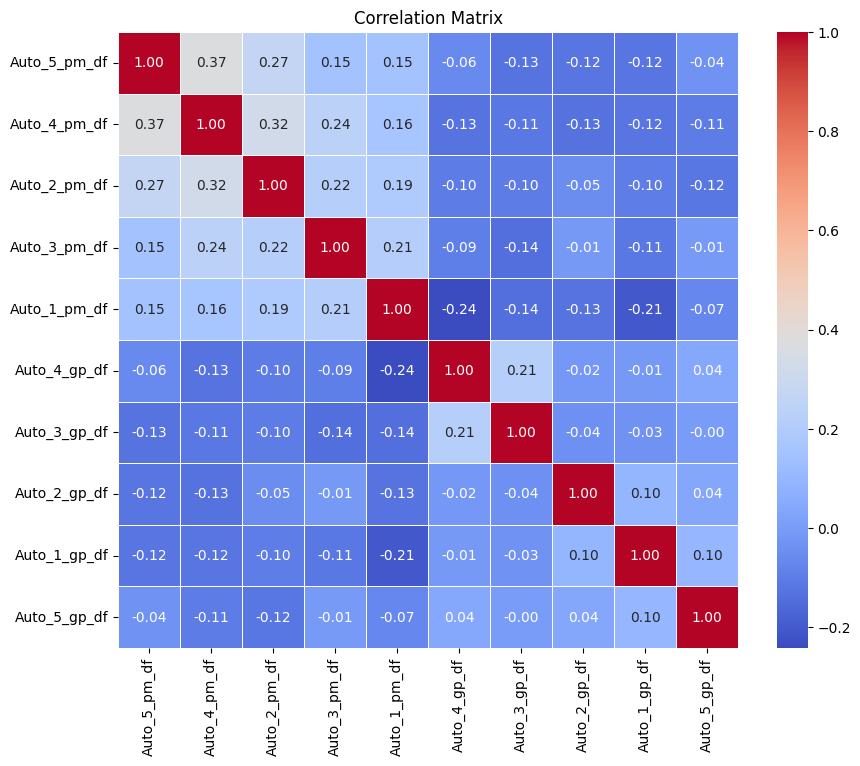

In [7]:
correlation_df_gp = correlation_matrix_total.apply(pd.to_numeric, errors='coerce')

plt.figure(figsize=(10, 8))
sns.heatmap(cluster_corr(correlation_df_gp), annot=True, cmap='coolwarm', linewidths=.5, fmt=".2f")
plt.title('Correlation Matrix')
plt.savefig(f'/content/drive/My Drive/Spearmann_c_analysis/Spearmanc_heat_all_compounds.png', dpi=300, bbox_inches='tight')
plt.show()

In [8]:
df_transposed = df.transpose()

# Calculate Spearman rank correlation matrix
correlation_matrix_compounds = df_transposed.corr(method='spearman')

# Display the correlation matrix
print(correlation_matrix_compounds)

Unnamed: 0                                          4H-Cyclopenta[b]thiophene-3-carboxylic acid, 2-[(1,3-benzodioxol-5-ylcarbonyl)amino]-5,6-dihydro-, methyl ester  \
Unnamed: 0                                                                                                                                                            
4H-Cyclopenta[b]thiophene-3-carboxylic acid, 2-...                                           1.000000                                                                 
N-Arachidoyl-5-hydroxytryptamine                                                            -0.319275                                                                 
9-(3-Chlorobenzyl)-9-hydroxy-3,6,10,10-tetramet...                                          -0.246914                                                                 
Propanoic acid, 2,3,3,3-tetrafluoro-2-methoxy-,...                                           0.253086                                                                

In [9]:
#plt.figure(figsize=(120, 100))

# Create a heatmap
#sns.heatmap(correlation_matrix_compounds, annot=True, cmap='coolwarm', vmin=-1, vmax=1)

#plt.savefig(f'/content/drive/My Drive/Spearmann_c_analysis/Spearmanc_heat_compounds_analysis.png', dpi=300, bbox_inches='tight')
#plt.show()

In [10]:
correlation_matrix_compounds_reordered = cluster_corr(correlation_matrix_compounds)

plt.figure(figsize=(130, 90))

# Create a heatmap
sns.heatmap(correlation_matrix_compounds_reordered, annot=False, cmap='coolwarm', vmin=-1, vmax=1)

plt.savefig(f'/content/drive/My Drive/Spearmann_c_analysis/Spearmanc_heat_compounds_analysis_ordered.png', dpi=300, bbox_inches='tight')
plt.show()